In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from Modules.Functions import * 

In [2]:
Distributed = loadPickle('Pickles/Distributed.pkl')
Chapters = loadPickle('Pickles/Chapters.pkl')

In [3]:
QuesDistribution = {x:0 for x in Distributed}
MarksDistribution = {x:0 for x in Distributed}

for x in Distributed:
    QuesDistribution[x] = sum([len(Distributed[x][y]) for y in range(1, 5)])
    MarksDistribution[x] = sum([len(Distributed[x][y])*y for y in range(1, 5)])

In [4]:
MarksDistribution

{'Real Numbers': 6,
 'Polynomials': 3,
 'Pair of Linear Equations in Two Variables': 0,
 'Quadratic Equations': 97,
 'Arithmetic Progressions': 67,
 'Triangles': 14,
 'Coordinate Geometry': 82,
 'Introduction to Trigonometry': 18,
 'Some Applications of Trigonometry': 40,
 'Circles': 97,
 'Constructions': 29,
 'Areas Related to Circles': 52,
 'Surface Areas and Volumes': 102,
 'Statistics': 8,
 'Probability': 52}

As we can see, the chapter with the maximum marks is, 'Surface Areas and Volumes'.  Let's see the question distribution for that.

In [5]:
import matplotlib.pyplot as plt

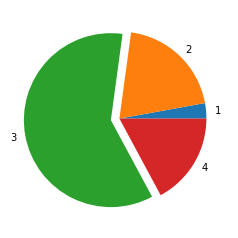

In [6]:
labels = ['1', '2', '3', '4'] # Different types of questions.
sizes = [len(Distributed['Surface Areas and Volumes'][x]) for x in Distributed['Surface Areas and Volumes']]
explode = (0, 0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels)
plt.show()

Therefore, we can see that, the maximum number of questions appear for 3 marks

Now, cleaning text for clustering.

In [7]:
from copy import deepcopy
cleaned_chapter = deepcopy(Distributed['Surface Areas and Volumes'])
init_chapter = deepcopy(cleaned_chapter)

In [8]:
for x in cleaned_chapter:
    for y in range(len(cleaned_chapter[x])):
        cleaned_chapter[x][y] = clean_text(preprocess_text(cleaned_chapter[x][y]))
    CleanedChapter = Distributed['Surface Areas and Volumes'] #this line would remove duplicate questions.

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaned_chapter[3]) #Since we only want 3 marker questions
true_k = 3 
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Let's See the top terms per cluster.

In [10]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print('Cluster %d' % i)
    for ind in order_centroids[i, :6]:
        print('%s' % terms[ind])
    Print('')

Cluster 0
bucket
heap
cm
height
conical
end

*******************************************************
Cluster 1
cm
diameter
surface
sphere
hemisphere
area

*******************************************************
Cluster 2
water
vessel
cylindrical
liquid
cm
diameter

*******************************************************


In [11]:
Organized = {x:[] for x in range(true_k)}
for x in range(len(cleaned_chapter[3])):
    y = vectorizer.transform([cleaned_chapter[3][x]])
    y = model.predict(y)[0]
    Organized[y].append(init_chapter[3][x])

for x in Organized:
    Print('Cluster %d' % x)
    for i, y in enumerate(Organized[x]):
        print('Q%s' % str(i+1), y)

Cluster 0
*******************************************************
Q1 a wooden article wa made by scooping out of hemisphere from each end of solid cylinder a shown in the given figure if the height of the cylinder is 10cm and it base is of radius 3 5 cm find the total surface area of the article or heap of rice is in the form of cone of base diameter 24 and height 3 5 find the volume of the rice how much canvas cloth is required to just cover the heap
Q2 27. A bucket open at the top, and made up of a metal sheet is in the form of a frustum of a cone. The depth of the bucket is 24 cm and the diameters of its upper and lower circular ends are 30 cm and 10 cm respectively. Find the cost of metal sheet used in it at the rate of Rs 10 per 100 cm2. Use 3.14
Q3  A cylindrical bucket, 32 cm high and with radius of base 18 cm, is filled with sand. This bucket is emptied on the ground and a conical heap of sand is formed. If the height of the conical heap is 24 cm, then find the radius and slant

***AfterWords:***
This way, we can identify different types of questions that come from a particular chapter, for different marks.